**Installing Libraries and Packages**

In [177]:
# Import Library
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
import os
import zipfile

!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Downloading files with kaggle**

In [178]:
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download pavansubhasht/ibm-hr-analytics-attrition-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ibm-hr-analytics-attrition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


**Unzipping Files and read the csv file**

In [179]:
path = os.getcwd()

data = path + '/ibm-hr-analytics-attrition-dataset.zip'
zip_ref = zipfile.ZipFile(data, 'r')
zip_ref.extractall(path)

zip_ref.close()

os.listdir()
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [180]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Checking if there's attribute has 1 value or you can say **missing value**

In [181]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Uncomment if there's missing value (if there's value from the above is 1)

In [182]:
# def meanOfCol(df, col):
#     sum=0

#     temp_df = df.loc[:,col]
#     temp_df = temp_df.fillna(0)

#     return temp_df.mean()

# def missingVal(df):
#     for col in df:
#         if df[col].isna().sum() > 0:
#             df[col] = df[col].fillna(meanOfCol(df, col))

# missingVal(data)
# data.isna().sum()

In [183]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

**Data Cleaning** (You can drop attribute you don't want)

In [184]:
to_drop = ['Department', 'EducationField', 'Over18', 'EmployeeCount', 'MaritalStatus', 'JobRole', 'Gender', 'BusinessTravel']
data.drop(to_drop, inplace=True, axis=1)

**Data Transform** (Making object type from zero to 1 only)

In [185]:
data = pd.get_dummies(data, prefix=['Attrition', 'OverTime'])
data

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,1,6,4,0,5,0,1,0,1
1,49,279,8,1,2,3,61,2,2,2,...,3,3,10,7,1,7,1,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,3,3,0,0,0,0,0,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,3,3,8,7,3,0,1,0,0,1
4,27,591,2,1,7,1,40,3,1,2,...,3,3,2,2,2,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,3,3,5,2,0,3,1,0,1,0
1466,39,613,6,1,2062,4,42,2,3,1,...,5,3,7,7,1,7,1,0,1,0
1467,27,155,4,3,2064,2,87,4,2,2,...,0,3,6,2,0,3,1,0,0,1
1468,49,1023,2,3,2065,4,63,2,2,2,...,3,2,9,6,0,8,1,0,1,0


**Determining Output Variable/s** (Predicting Performance Rating)

In [186]:
pr = "PerformanceRating"

x = data.loc[:, data.columns != pr]
y = data[["PerformanceRating"]]
x

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,1,6,4,0,5,0,1,0,1
1,49,279,8,1,2,3,61,2,2,2,...,3,3,10,7,1,7,1,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,3,3,0,0,0,0,0,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,3,3,8,7,3,0,1,0,0,1
4,27,591,2,1,7,1,40,3,1,2,...,3,3,2,2,2,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,3,3,5,2,0,3,1,0,1,0
1466,39,613,6,1,2062,4,42,2,3,1,...,5,3,7,7,1,7,1,0,1,0
1467,27,155,4,3,2064,2,87,4,2,2,...,0,3,6,2,0,3,1,0,0,1
1468,49,1023,2,3,2065,4,63,2,2,2,...,3,2,9,6,0,8,1,0,1,0


**Data Standardization**

In [187]:
def sameValue(df, col):
    same = False
    first_val = df[col].iloc[0]
    for i in range(len(df.index)):
        if first_val == df[col].iloc[i]:
            same = True
        else:
            same = False
            break
    return same

for col in data:
  if len(col) < 8:
    print('{}\t\t{}'.format(col, sameValue(data, col)))
  else:
    print('{}\t{}'.format(col, sameValue(data, col)))

Age		False
DailyRate	False
DistanceFromHome	False
Education	False
EmployeeNumber	False
EnvironmentSatisfaction	False
HourlyRate	False
JobInvolvement	False
JobLevel	False
JobSatisfaction	False
MonthlyIncome	False
MonthlyRate	False
NumCompaniesWorked	False
PercentSalaryHike	False
PerformanceRating	False
RelationshipSatisfaction	False
StandardHours	True
StockOptionLevel	False
TotalWorkingYears	False
TrainingTimesLastYear	False
WorkLifeBalance	False
YearsAtCompany	False
YearsInCurrentRole	False
YearsSinceLastPromotion	False
YearsWithCurrManager	False
Attrition_No	False
Attrition_Yes	False
OverTime_No	False
OverTime_Yes	False


2nd **Data Transforming**

In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

y = LabelEncoder().fit_transform(y.astype('str'))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [189]:
x_scaled

array([[ 0.4463504 ,  0.74252653, -1.01090934, ...,  2.28090588,
        -1.59174553,  1.59174553],
       [ 1.32236521, -1.2977746 , -0.14714972, ..., -0.4384223 ,
         0.62824112, -0.62824112],
       [ 0.008343  ,  1.41436324, -0.88751511, ...,  2.28090588,
        -1.59174553,  1.59174553],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.4384223 ,
        -1.59174553,  1.59174553],
       [ 1.32236521,  0.54667746, -0.88751511, ..., -0.4384223 ,
         0.62824112, -0.62824112],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.4384223 ,
         0.62824112, -0.62824112]])

In [190]:
y

array([0, 1, 0, ..., 1, 0, 0])

**Creating variables for train and test data to split the data** (80% train and 20% test)

In [191]:
# Implementasi Data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

**Model** for the data

In [192]:
import tensorflow as tf

# Set random value to fixed number
tf.keras.backend.clear_session()
tf.random.set_seed(99)
np.random.seed(99)

# Model
def modelLR():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(70, activation="relu"), 
    tf.keras.layers.Dense(35, activation="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid'),
  ])
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=["accuracy"])
  return model
model = modelLR()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12)

Epoch 1/12
37/37 [==============================] - 1s 7ms/step - loss: 0.4644 - accuracy: 0.8053 - val_loss: 0.3435 - val_accuracy: 0.8537
Epoch 2/12
37/37 [==============================] - 0s 3ms/step - loss: 0.3182 - accuracy: 0.8495 - val_loss: 0.2519 - val_accuracy: 0.8878
Epoch 3/12
37/37 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.8929 - val_loss: 0.1718 - val_accuracy: 0.9286
Epoch 4/12
37/37 [==============================] - 0s 3ms/step - loss: 0.1580 - accuracy: 0.9498 - val_loss: 0.1237 - val_accuracy: 0.9694
Epoch 5/12
37/37 [==============================] - 0s 3ms/step - loss: 0.1150 - accuracy: 0.9651 - val_loss: 0.0934 - val_accuracy: 0.9762
Epoch 6/12
37/37 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9830 - val_loss: 0.0752 - val_accuracy: 0.9796
Epoch 7/12
37/37 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9915 - val_loss: 0.0669 - val_accuracy: 0.9796
Epoch 8/12
37/37 [==

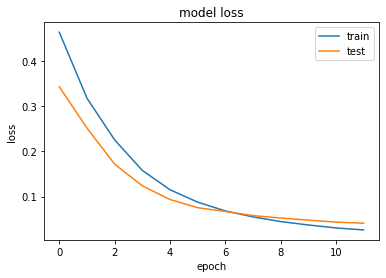

In [193]:
from matplotlib import pyplot as plt 
history.history.keys() 
['accuracy', 'loss', 'val_accuracy', 'val_loss'], plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
plt.show()

In [198]:
X_test[0]

array([-0.06213452, -0.36709025])

In [199]:
y_test[0]

-27.862486259199297

**Predict with Linear Regression**

In [196]:
# example of training a final regression model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# generate regression dataset
X_test, y_test = make_regression(n_samples=100, n_features=2, noise=0.1)
# fit final model
model = LinearRegression()
model.fit(X_test, y_test)
Xnew, _ = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-1.07296862 -0.52817175], Predicted=-75.19328883871754
X=[-0.61175641  1.62434536], Predicted=91.95584853569017
X=[-2.3015387   0.86540763], Predicted=-21.37860961690832
